# Battery_Electric_Vehicles

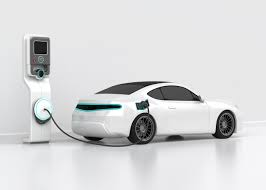

# About Dataset
Data source

Note: Vehicle manufacturers now use the 5-cycle testing procedure, introduced for model year 2015, to determine the fuel consumption ratings of new light-duty vehicles. 5-cycle testing produces fuel consumption ratings
that are more representative of a vehicle’s on-road fuel consumption. To help you compare vehicles from different model years, the ratings for 1995 to 2014 vehicles have been adjusted to reflect the improved testing.

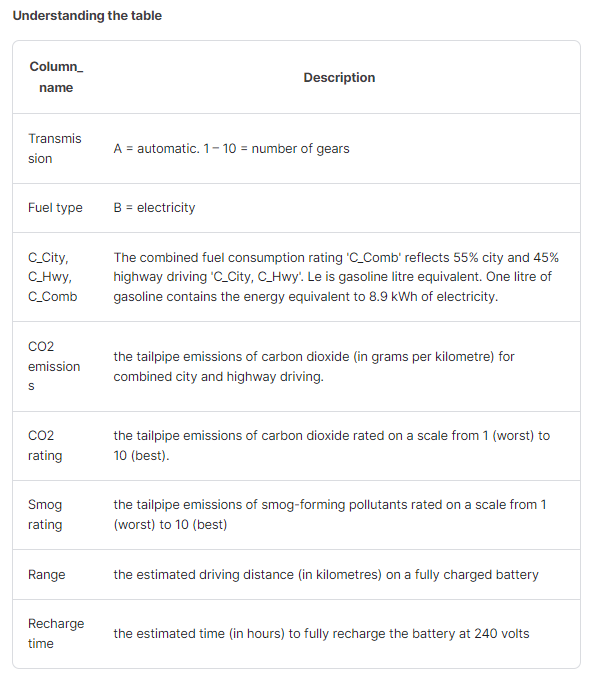

In [ ]:
# 캐글 입력 코드 참고

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams # ?? runtime configuration parameters -> 딕셔너리로 그림
from matplotlib.cm import rainbow # ?? cm == colormap
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 딕셔너리 값

Artists = set()
for key in matplotlib.rcParams.keys():
    if "." in key:
        Artists .add(key.split(".")[0])

print(Artists)
{'_internal',
 'agg', 'animation','axes',
 'axes3d','boxplot','contour',
 'date','docstring','errorbar',
 'figure','font','grid',
 'hatch','hist', 'image',
 'keymap','legend','lines',
 'markers','mathtext','patch',
 'path','pcolor', 'pcolormesh',
 'pdf','pgf','polaraxes',
 'ps','savefig', 'scatter',
 'svg','text', 'tk',
 'webagg', 'xaxis','xtick',
 'yaxis', 'ytick'}

In [ ]:
# colormap
Matplot에는 여러 개의 Color를 섞은 Colormap이 있습니다.  

다음 코드로 cmap의 모든 이름들을 가져올 수 있습니다. 

import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

In [12]:
# 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/배터리_전기차_분석/"    

data_df = pd.read_csv(base_path + "Battery_Electric_Vehicles.csv", encoding="utf-8" )


In [13]:
data_df.head()

,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,Fuel_Type,C_City (kWh/100 km),C_Hwy (kWh/100 km),C_Comb (kWh/100 km),C_City (Le/100 km),C_Hwy (Le/100 km),C_Comb (Le/100 km),Range_(km),CO2 Emissions_(g/km),CO2 _Rating,Smog_Rating,Recharge_Time (h)
0,2012,Mitsubishi,i-MiEV,Subcompact,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100.0,0.0,NaN,NaN,7.0
1,2012,Nissan,LEAF,Mid-size,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117.0,0.0,NaN,NaN,7.0
2,2013,Ford,Focus Electric,Compact,107.0,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,122.0,0.0,NaN,NaN,4.0
3,2013,Mitsubishi,i-MiEV,Subcompact,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100.0,0.0,NaN,NaN,7.0
4,2013,Nissan,LEAF,Mid-size,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117.0,0.0,NaN,NaN,7.0


In [14]:
data_df.tail()

,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,Fuel_Type,C_City (kWh/100 km),C_Hwy (kWh/100 km),C_Comb (kWh/100 km),C_City (Le/100 km),C_Hwy (Le/100 km),C_Comb (Le/100 km),Range_(km),CO2 Emissions_(g/km),CO2 _Rating,Smog_Rating,Recharge_Time (h)
305,2022,Tesla,Model Y Performance,SUV: Small,312.0,A1,B,18.2,19.8,18.9,2.0,2.2,2.1,488.0,0.0,10.0,10.0,10.0
306,2022,Volkswagen,ID.4 Pro,SUV: Small,150.0,A1,B,18.7,22.0,20.2,2.1,2.5,2.3,422.0,0.0,10.0,10.0,7.5
307,2022,Volkswagen,ID.4 AWD Pro,SUV: Small,220.0,A1,B,21.0,23.2,22.0,2.4,2.6,2.5,394.0,0.0,10.0,10.0,7.5
308,2022,Volvo,C40 Recharge Twin,SUV: Small,300.0,A1,B,22.2,26.1,23.9,2.5,2.9,2.7,364.0,0.0,10.0,10.0,8.0
309,2022,Volvo,XC40 Recharge Twin,SUV: Small,300.0,A1,B,22.8,26.6,24.5,2.6,3.0,2.8,359.0,0.0,10.0,10.0,8.0


In [84]:
def data_number(x):
    column_names = x.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수
    type(column_names)
    print(column_names, "\n")

    for i in column_names:
        print(f"{i} = {x[i].nunique()}", "\n")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다

In [85]:
data_number(data_df)

['Model_Year', 'Make', 'Model', 'Vehicle Class', 'Motor_(kW)', 'Transmission', 'C_City (kWh/100 km)', 'C_Hwy (kWh/100 km)', 'C_Comb (kWh/100 km)', 'C_City (Le/100 km)', 'C_Hwy (Le/100 km)', 'C_Comb (Le/100 km)', 'Range_(km)', 'Recharge_Time (h)'] 

Model_Year = 11 

Make = 20 

Model = 137 

Vehicle Class = 8 

Motor_(kW) = 56 

Transmission = 2 

C_City (kWh/100 km) = 89 

C_Hwy (kWh/100 km) = 85 

C_Comb (kWh/100 km) = 84 

C_City (Le/100 km) = 18 

C_Hwy (Le/100 km) = 14 

C_Comb (Le/100 km) = 16 

Range_(km) = 124 

Recharge_Time (h) = 32 



In [82]:
def data_kind(x):
    column_names = x.columns.values.tolist() 

    for i in column_names:
        print(f"{i} = {x[i].unique()}", "\n")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

In [83]:
data_kind(data_df)

Model_Year = [2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022.] 

Make = ['Mitsubishi' 'Nissan' 'Ford' 'smart' 'Tesla' 'Chevrolet' 'BMW' 'Kia'
 'Tesla ' 'Hyundai' 'Volkswagen' 'smart EQ' 'Audi' 'MINI' 'Polestar'
 'Porsche' 'Lucid' 'Mazda' 'Mercedes-Benz' 'Volvo'] 

Model = ['i-MiEV' 'LEAF' 'Focus Electric' 'fortwo electric drive cabriolet'
 'fortwo electric drive coupe' 'Model S (40 kWh)' 'Model S (60 kWh)'
 'Model S (85 kWh)' 'Model S Performance' 'Spark EV' 'i3' 'Soul EV'
 'Model S (70 kWh)' 'Model S (85/90 kWh)' 'Model S 70D' 'Model S 85D/90D'
 'Model S P85D/P90D' 'LEAF (24 kWh)' 'LEAF (30 kWh)'
 'Model S (60 kWh pre- 6/16)' 'Model S (75 kWh)' 'Model S 60D'
 'Model S 75D' 'Model S 90D (Refresh)' 'Model S P90D (Refresh)'
 'Model S P100D' 'Model X 60D' 'Model X 75D' 'Model X 90D' 'Model X P90D'
 'Model X P100D' 'i3 (60 Ah)' 'i3 (94 Ah)' 'Bolt EV' 'IONIQ Electric'
 'Model S 90D' 'Model S 100D' 'Model S P90D' 'Model X 100D' 'e-Golf' 'i3s'
 'Model 3 Mid Range' 'Model 3 L

# EDA

In [15]:
!pip install fasteda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4736 sha256=dd8a484bb8cbc4229cafc28140b63072d3183a951c259a3c710b318675e64701
  Stored in directory: /root/.cache/pip/wheels/93/57/7e/fdc4b9923cf3f1f46de4e2ea7a5a4acb335357f919920ffb7c
Successfully built fasteda


DataFrame Head:


,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,Fuel_Type,C_City (kWh/100 km),C_Hwy (kWh/100 km),C_Comb (kWh/100 km),C_City (Le/100 km),C_Hwy (Le/100 km),C_Comb (Le/100 km),Range_(km),CO2 Emissions_(g/km),CO2 _Rating,Smog_Rating,Recharge_Time (h)
0,2012,Mitsubishi,i-MiEV,Subcompact,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100.0,0.0,NaN,NaN,7.0
1,2012,Nissan,LEAF,Mid-size,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117.0,0.0,NaN,NaN,7.0
2,2013,Ford,Focus Electric,Compact,107.0,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,122.0,0.0,NaN,NaN,4.0


DataFrame Tail:


,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,Fuel_Type,C_City (kWh/100 km),C_Hwy (kWh/100 km),C_Comb (kWh/100 km),C_City (Le/100 km),C_Hwy (Le/100 km),C_Comb (Le/100 km),Range_(km),CO2 Emissions_(g/km),CO2 _Rating,Smog_Rating,Recharge_Time (h)
307,2022,Volkswagen,ID.4 AWD Pro,SUV: Small,220.0,A1,B,21.0,23.2,22.0,2.4,2.6,2.5,394.0,0.0,10.0,10.0,7.5
308,2022,Volvo,C40 Recharge Twin,SUV: Small,300.0,A1,B,22.2,26.1,23.9,2.5,2.9,2.7,364.0,0.0,10.0,10.0,8.0
309,2022,Volvo,XC40 Recharge Twin,SUV: Small,300.0,A1,B,22.8,26.6,24.5,2.6,3.0,2.8,359.0,0.0,10.0,10.0,8.0


----------------------------------------------------------------------------------------------------
Missing values:


,0
CO2 _Rating,34
Smog_Rating,61


----------------------------------------------------------------------------------------------------
MSNO Matrix:



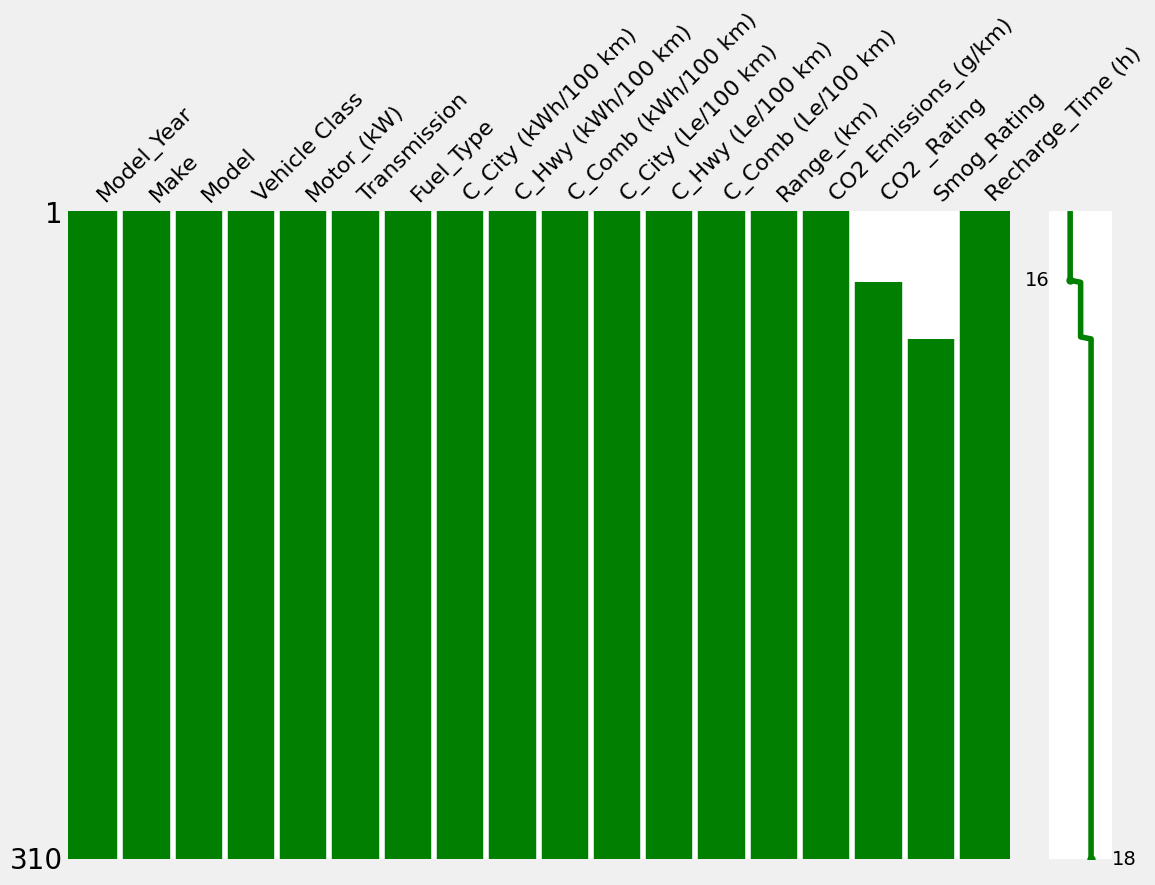

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(310, 18)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model_Year            310 non-null    int64  
 1   Make                  310 non-null    object 
 2   Model                 310 non-null    object 
 3   Vehicle Class         310 non-null    object 
 4   Motor_(kW)            310 non-null    float64
 5   Transmission          310 non-null    object 
 6   Fuel_Type             310 non-null    object 
 7   C_City (kWh/100 km)   310 non-null    float64
 8   C_Hwy (kWh/100 km)    310 non-null    float64
 9   C_Comb (kWh/100 km)   310 non-null    float64
 10  C_City (Le/100 km)    310 n

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Model_Year,310,2019.206,2020,2.655,2012,2017,2020,2022,2022,-0.589622,-0.862082
Motor_(kW),310,293.206,285,175.575,35,150,285,386,829,0.725863,0.001534
C_City (kWh/100 km),310,20.202,19,4.131,13.7,16.9,19,23,32.9,0.788482,-0.377271
C_Hwy (kWh/100 km),310,21.938,21.4,3.408,15.7,19.7,21.4,23.2,35,0.930243,0.644395
C_Comb (kWh/100 km),310,20.989,20.1,3.665,14.8,18.5,20.1,22.675,32.4,0.849166,-0.131908
C_City (Le/100 km),310,2.271,2.1,0.463,1.6,1.9,2.1,2.6,3.7,0.802863,-0.344097
C_Hwy (Le/100 km),310,2.462,2.4,0.38,1.8,2.2,2.4,2.6,3.9,0.928048,0.672779
C_Comb (Le/100 km),310,2.356,2.25,0.41,1.7,2.1,2.25,2.575,3.6,0.856367,-0.121098
Range_(km),310,374.681,385.5,149.384,92,300.75,385.5,482.5,837,0.082257,0.421646
CO2 Emissions_(g/km),310,0,0,0,0,0,0,0,0,nan,nan


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



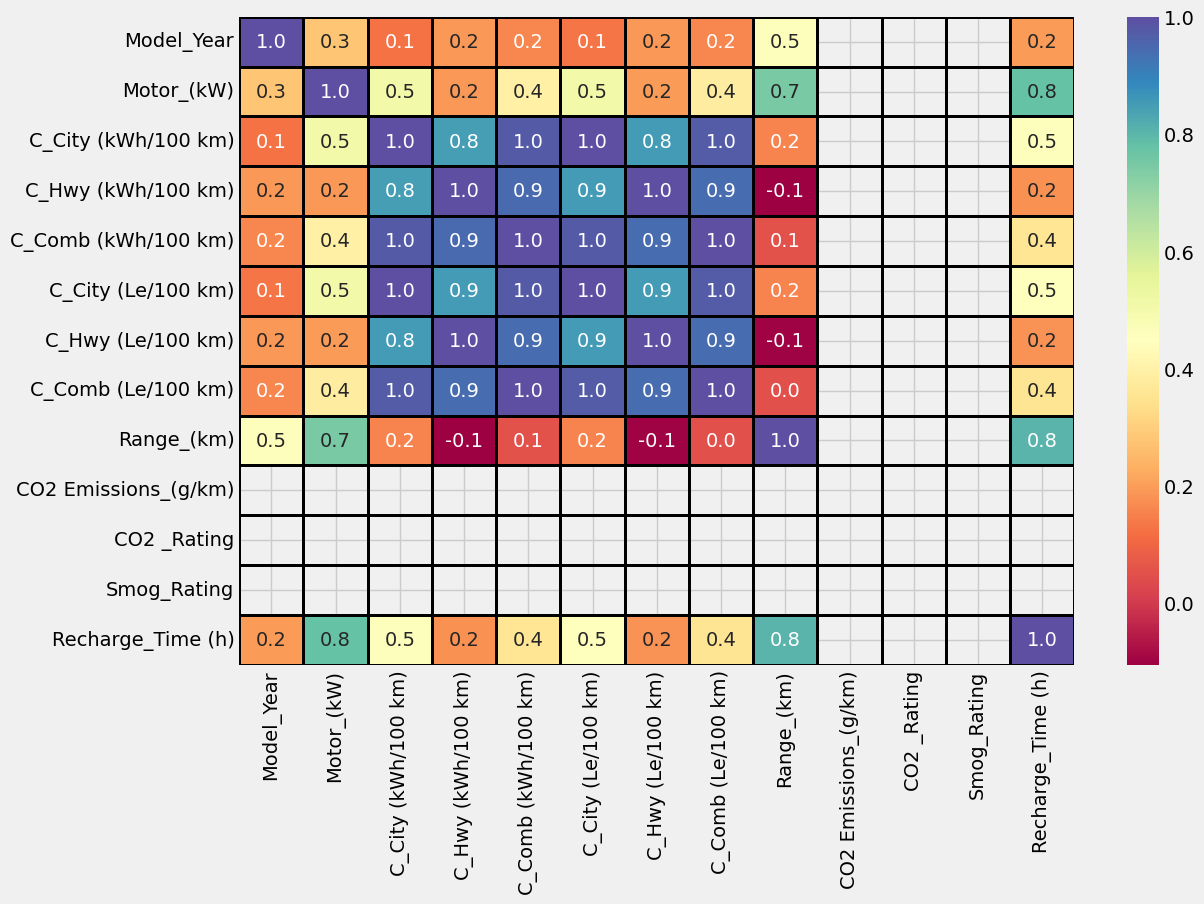

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



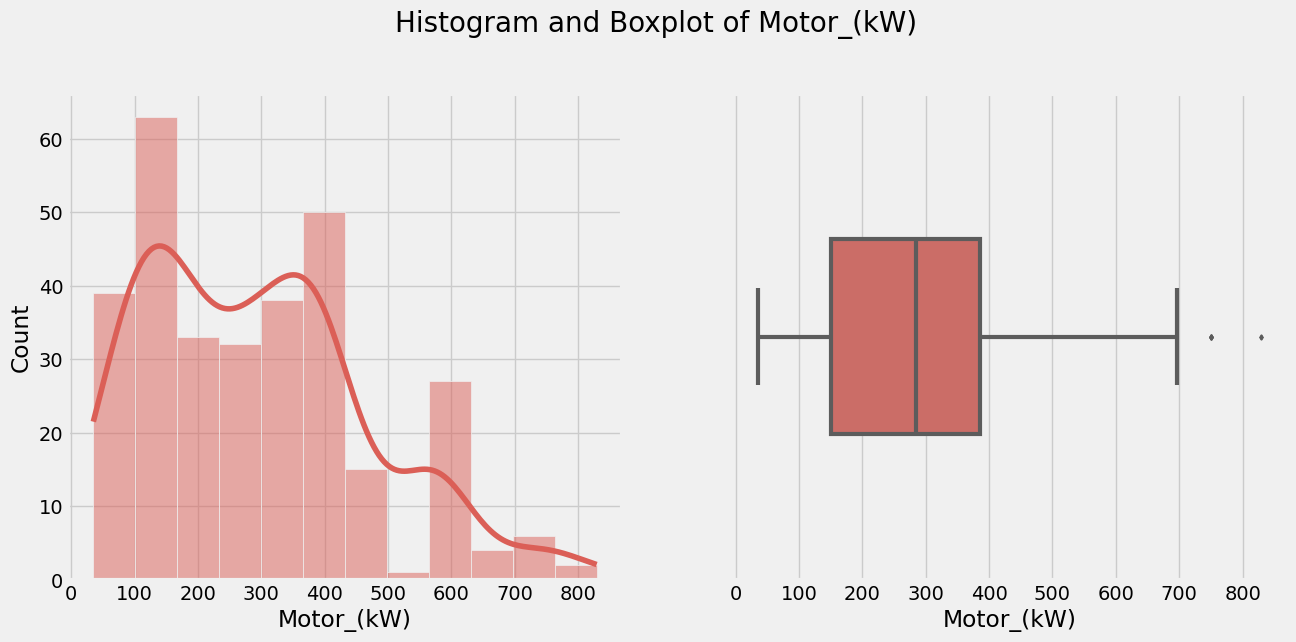

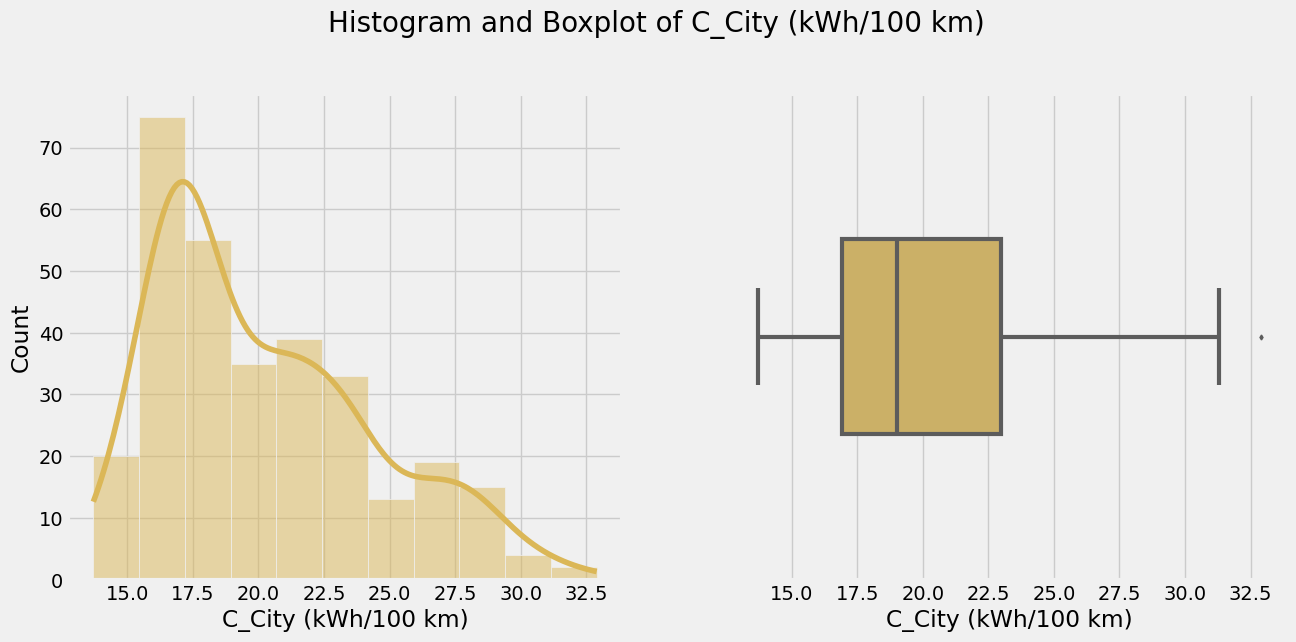

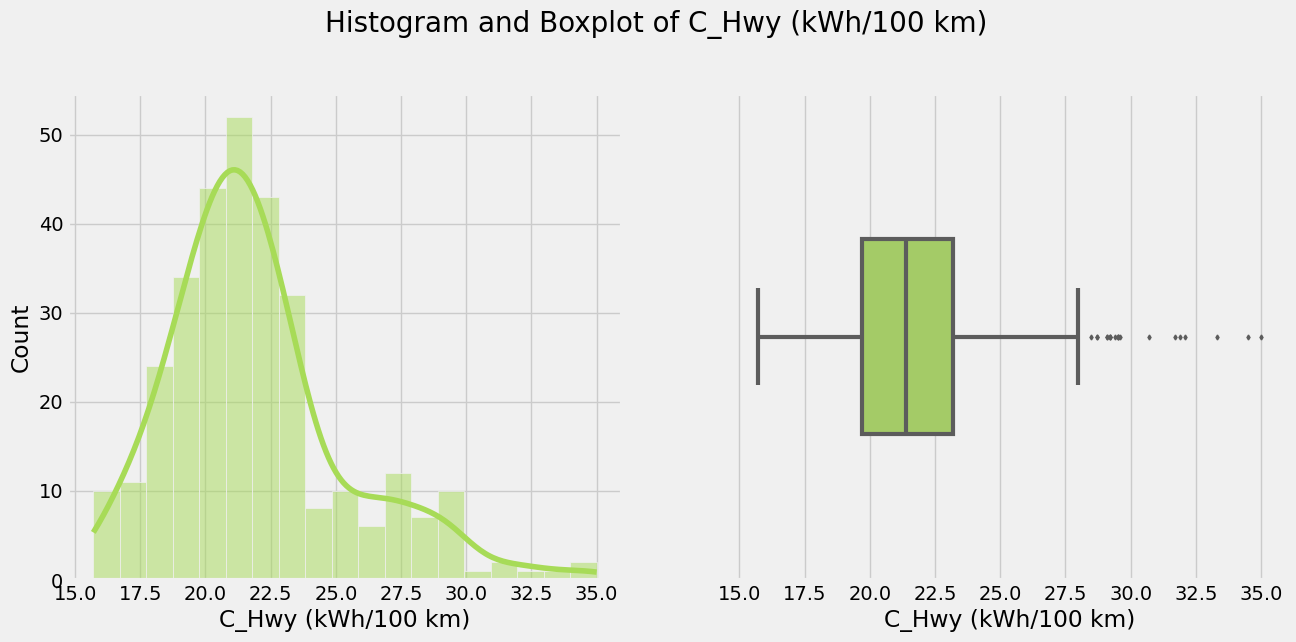

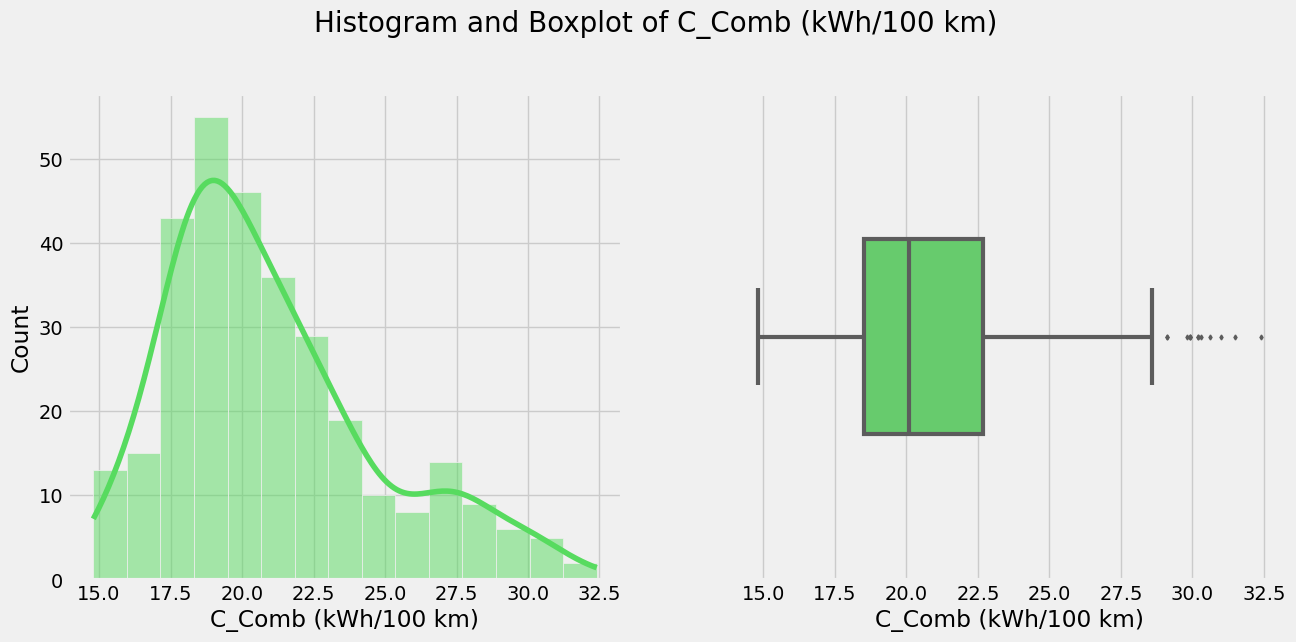

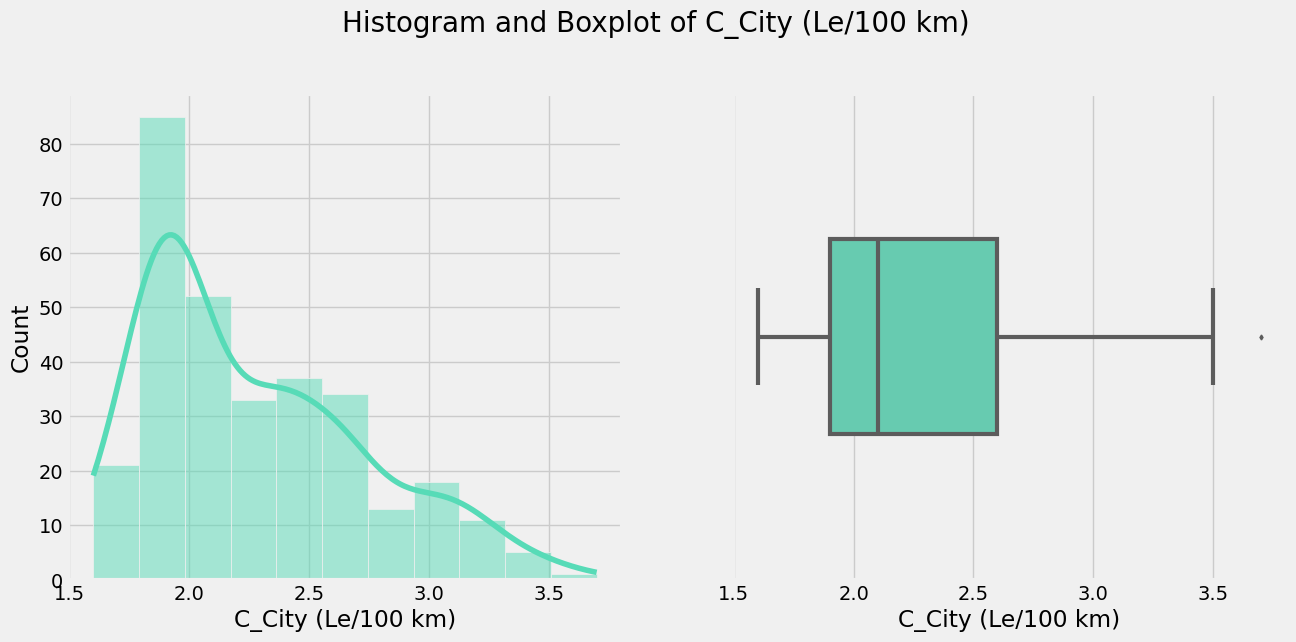

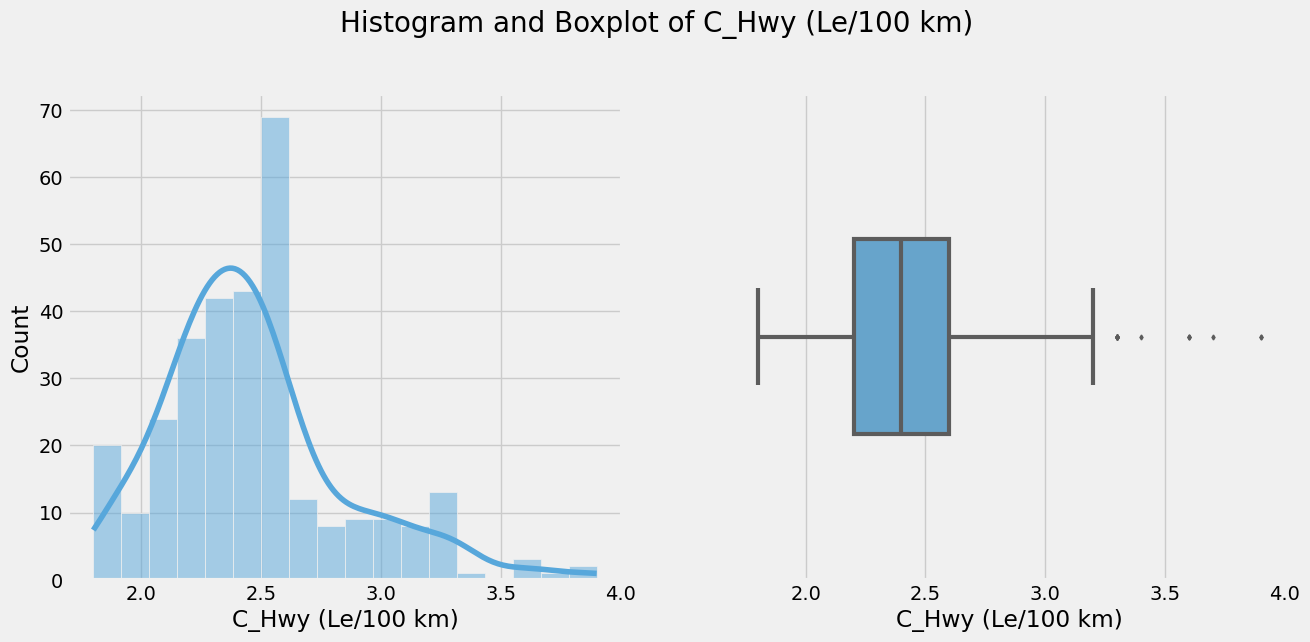

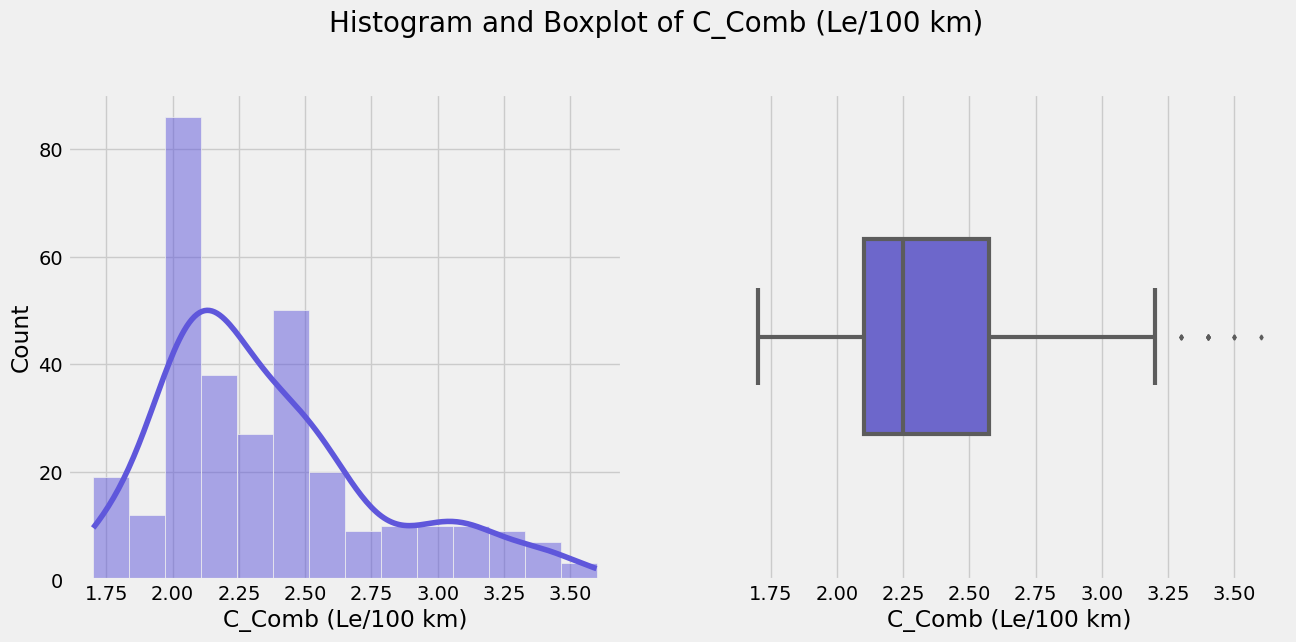

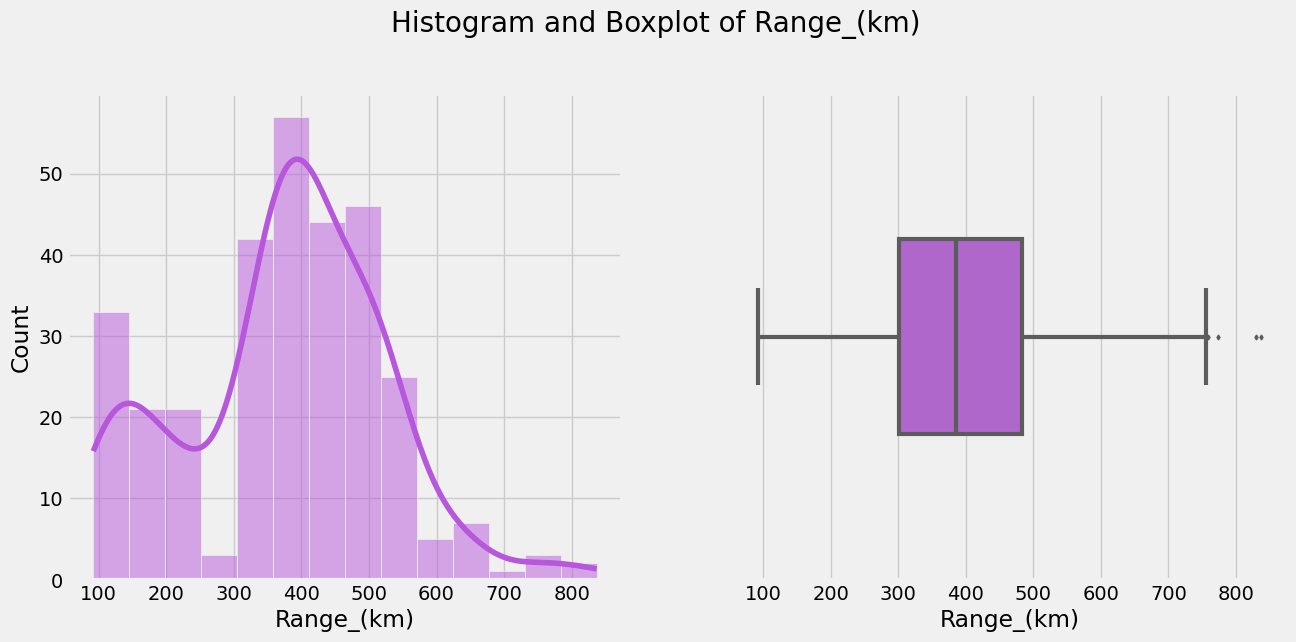

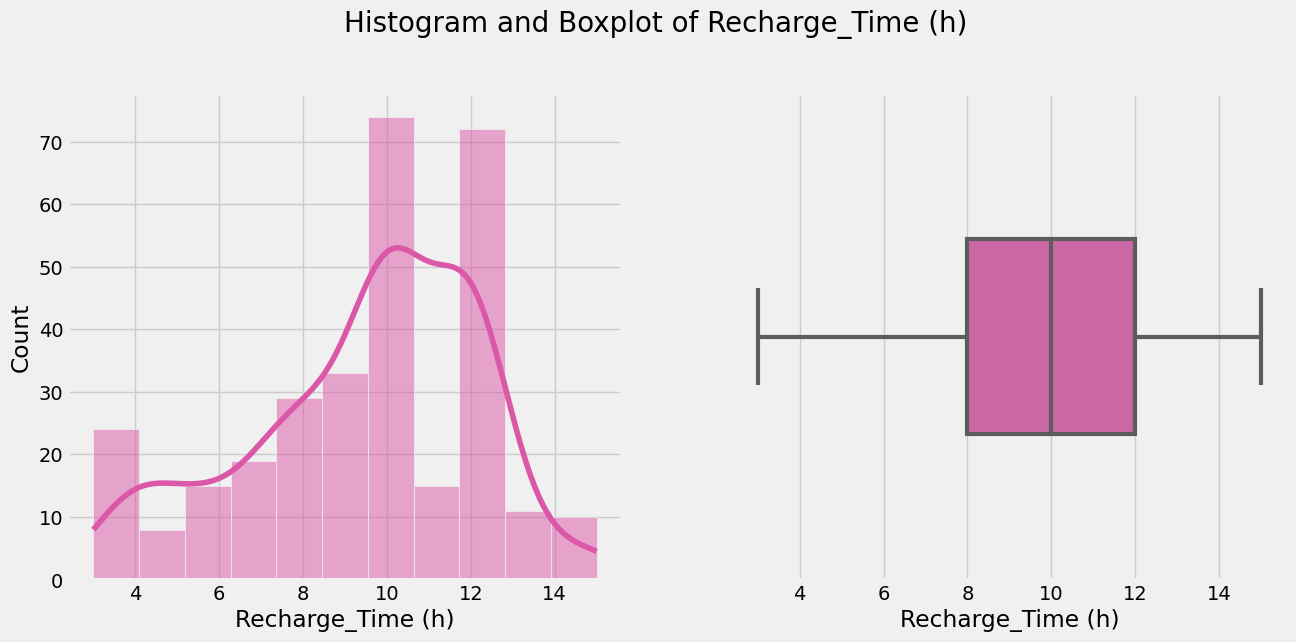

----------------------------------------------------------------------------------------------------
Countplot(s):



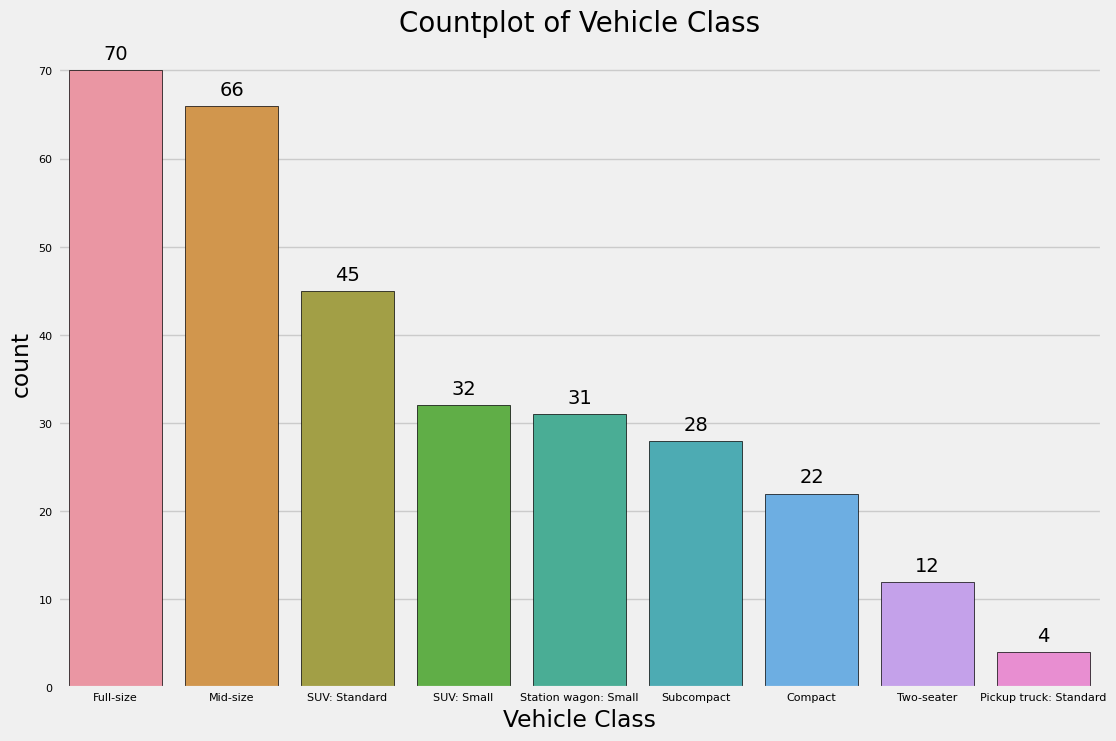

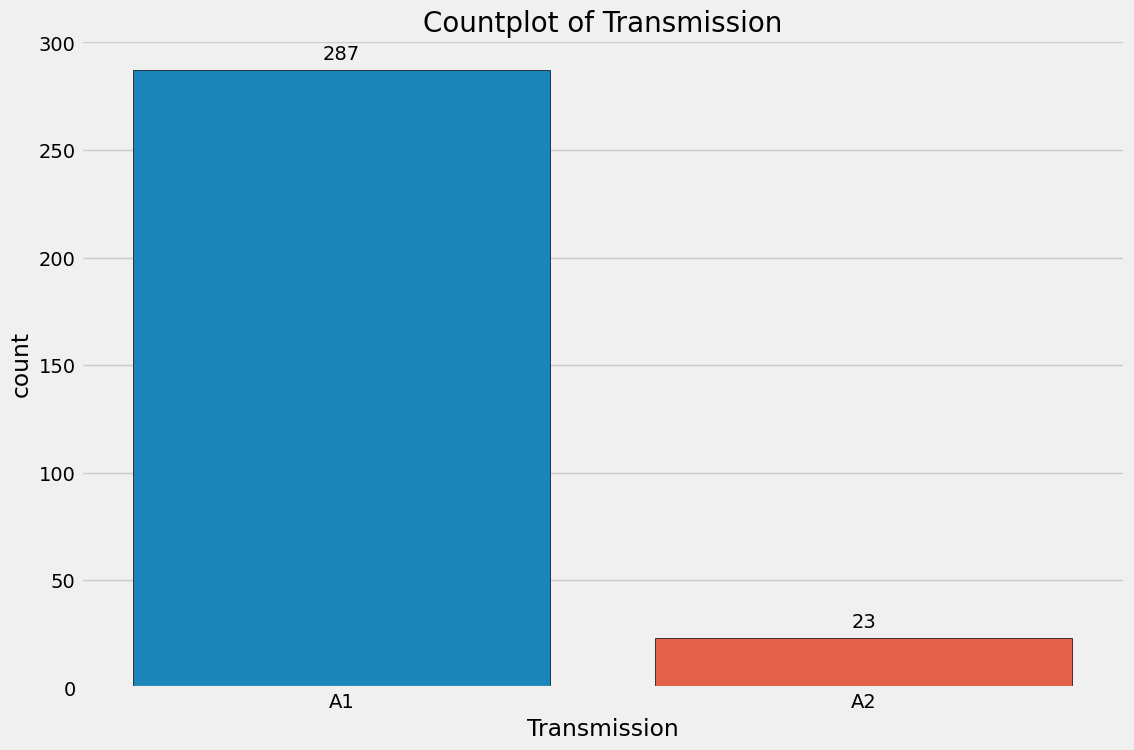

<Figure size 1200x800 with 0 Axes>

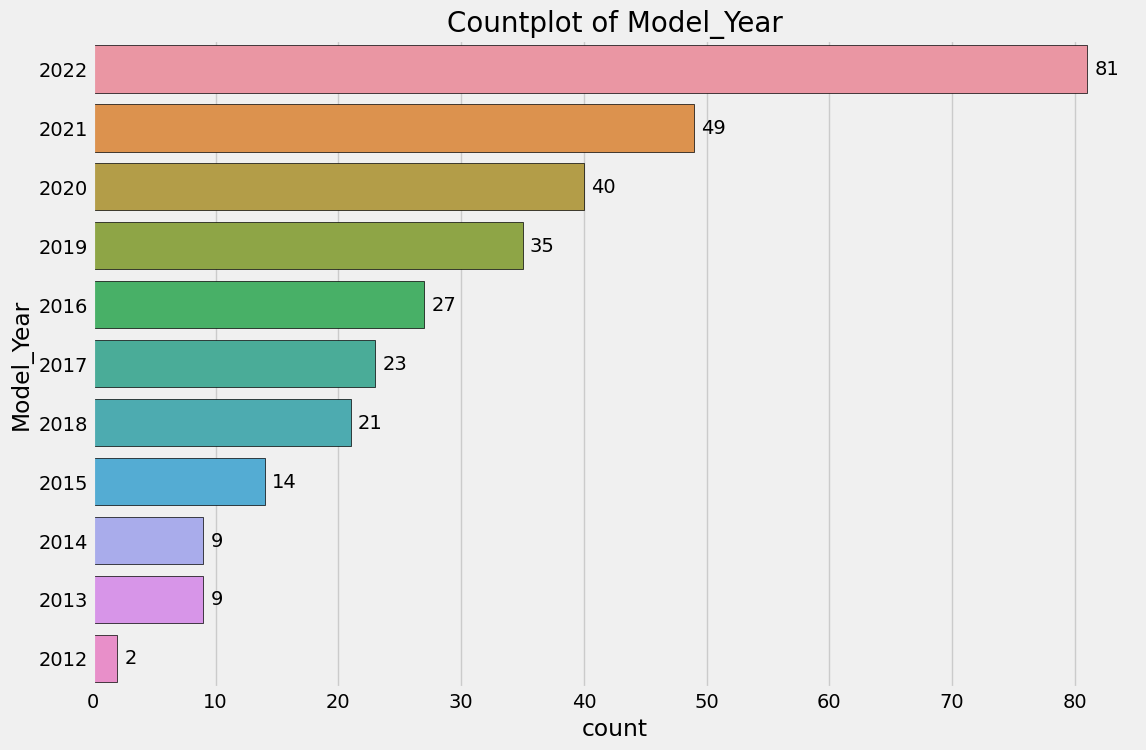

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [17]:
from fasteda import fast_eda
fast_eda(data_df)

In [19]:
data_df.head()

,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,Fuel_Type,C_City (kWh/100 km),C_Hwy (kWh/100 km),C_Comb (kWh/100 km),C_City (Le/100 km),C_Hwy (Le/100 km),C_Comb (Le/100 km),Range_(km),CO2 Emissions_(g/km),CO2 _Rating,Smog_Rating,Recharge_Time (h)
0,2012,Mitsubishi,i-MiEV,Subcompact,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100.0,0.0,NaN,NaN,7.0
1,2012,Nissan,LEAF,Mid-size,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117.0,0.0,NaN,NaN,7.0
2,2013,Ford,Focus Electric,Compact,107.0,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,122.0,0.0,NaN,NaN,4.0
3,2013,Mitsubishi,i-MiEV,Subcompact,49.0,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100.0,0.0,NaN,NaN,7.0
4,2013,Nissan,LEAF,Mid-size,80.0,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117.0,0.0,NaN,NaN,7.0


In [20]:
data_df.tail()

,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,Fuel_Type,C_City (kWh/100 km),C_Hwy (kWh/100 km),C_Comb (kWh/100 km),C_City (Le/100 km),C_Hwy (Le/100 km),C_Comb (Le/100 km),Range_(km),CO2 Emissions_(g/km),CO2 _Rating,Smog_Rating,Recharge_Time (h)
305,2022,Tesla,Model Y Performance,SUV: Small,312.0,A1,B,18.2,19.8,18.9,2.0,2.2,2.1,488.0,0.0,10.0,10.0,10.0
306,2022,Volkswagen,ID.4 Pro,SUV: Small,150.0,A1,B,18.7,22.0,20.2,2.1,2.5,2.3,422.0,0.0,10.0,10.0,7.5
307,2022,Volkswagen,ID.4 AWD Pro,SUV: Small,220.0,A1,B,21.0,23.2,22.0,2.4,2.6,2.5,394.0,0.0,10.0,10.0,7.5
308,2022,Volvo,C40 Recharge Twin,SUV: Small,300.0,A1,B,22.2,26.1,23.9,2.5,2.9,2.7,364.0,0.0,10.0,10.0,8.0
309,2022,Volvo,XC40 Recharge Twin,SUV: Small,300.0,A1,B,22.8,26.6,24.5,2.6,3.0,2.8,359.0,0.0,10.0,10.0,8.0


In [21]:
data_df['CO2 Emissions_(g/km)'].unique()

array([0.])

In [22]:
data_df['CO2 _Rating'].unique()

array([nan, 10.])

In [23]:
data_df['Smog_Rating'].unique()

array([nan, 10.])

In [24]:
data_df['Fuel_Type'].unique()

array(['B'], dtype=object)

In [25]:
data_df = data_df.drop(columns=['CO2 Emissions_(g/km)','CO2 _Rating','Smog_Rating','Fuel_Type'])

In [26]:
data_df.head()

,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,C_City (kWh/100 km),C_Hwy (kWh/100 km),C_Comb (kWh/100 km),C_City (Le/100 km),C_Hwy (Le/100 km),C_Comb (Le/100 km),Range_(km),Recharge_Time (h)
0,2012,Mitsubishi,i-MiEV,Subcompact,49.0,A1,16.9,21.4,18.7,1.9,2.4,2.1,100.0,7.0
1,2012,Nissan,LEAF,Mid-size,80.0,A1,19.3,23.0,21.1,2.2,2.6,2.4,117.0,7.0
2,2013,Ford,Focus Electric,Compact,107.0,A1,19.0,21.1,20.0,2.1,2.4,2.2,122.0,4.0
3,2013,Mitsubishi,i-MiEV,Subcompact,49.0,A1,16.9,21.4,18.7,1.9,2.4,2.1,100.0,7.0
4,2013,Nissan,LEAF,Mid-size,80.0,A1,19.3,23.0,21.1,2.2,2.6,2.4,117.0,7.0


In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model_Year           310 non-null    int64  
 1   Make                 310 non-null    object 
 2   Model                310 non-null    object 
 3   Vehicle Class        310 non-null    object 
 4   Motor_(kW)           310 non-null    float64
 5   Transmission         310 non-null    object 
 6   C_City (kWh/100 km)  310 non-null    float64
 7   C_Hwy (kWh/100 km)   310 non-null    float64
 8   C_Comb (kWh/100 km)  310 non-null    float64
 9   C_City (Le/100 km)   310 non-null    float64
 10  C_Hwy (Le/100 km)    310 non-null    float64
 11  C_Comb (Le/100 km)   310 non-null    float64
 12  Range_(km)           310 non-null    float64
 13  Recharge_Time (h)    310 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 34.0+ KB


In [28]:
data_df.corr()

,Model_Year,Motor_(kW),C_City (kWh/100 km),C_Hwy (kWh/100 km),C_Comb (kWh/100 km),C_City (Le/100 km),C_Hwy (Le/100 km),C_Comb (Le/100 km),Range_(km),Recharge_Time (h)
Model_Year,1.000000,0.278475,0.127018,0.189858,0.159079,0.131788,0.191694,0.161305,0.457694,0.196743
Motor_(kW),0.278475,1.000000,0.505524,0.190964,0.394072,0.503960,0.196240,0.386477,0.749344,0.775537
C_City (kWh/100 km),0.127018,0.505524,1.000000,0.848487,0.975194,0.997958,0.849321,0.972854,0.155335,0.458655
C_Hwy (kWh/100 km),0.189858,0.190964,0.848487,1.000000,0.944098,0.850152,0.997177,0.942321,-0.105184,0.179248
C_Comb (kWh/100 km),0.159079,0.394072,0.975194,0.944098,1.000000,0.974797,0.943428,0.997359,0.052950,0.359036
C_City (Le/100 km),0.131788,0.503960,0.997958,0.850152,0.974797,1.000000,0.850947,0.972164,0.154673,0.454148
C_Hwy (Le/100 km),0.191694,0.196240,0.849321,0.997177,0.943428,0.850947,1.000000,0.941480,-0.099619,0.183934
C_Comb (Le/100 km),0.161305,0.386477,0.972854,0.942321,0.997359,0.972164,0.941480,1.000000,0.046836,0.353465
Range_(km),0.457694,0.749344,0.155335,-0.105184,0.052950,0.154673,-0.099619,0.046836,1.000000,0.803163
Recharge_Time (h),0.196743,0.775537,0.458655,0.179248,0.359036,0.454148,0.183934,0.353465,0.803163,1.000000


#  Outlier Analysis and removal

<Axes: ylabel='Frequency'>

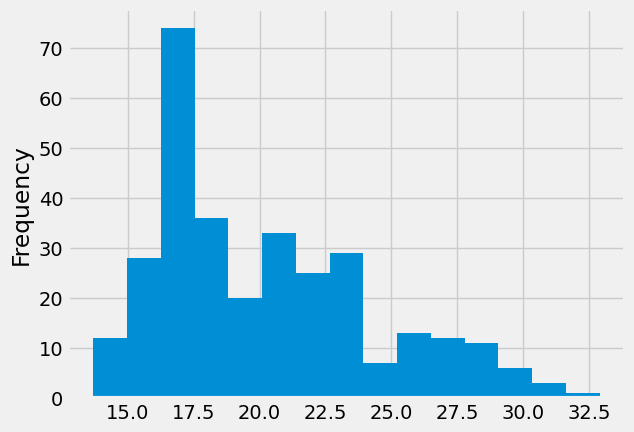

In [29]:
data_df['C_City (kWh/100 km)'].plot(kind='hist', bins=15)

<Axes: >

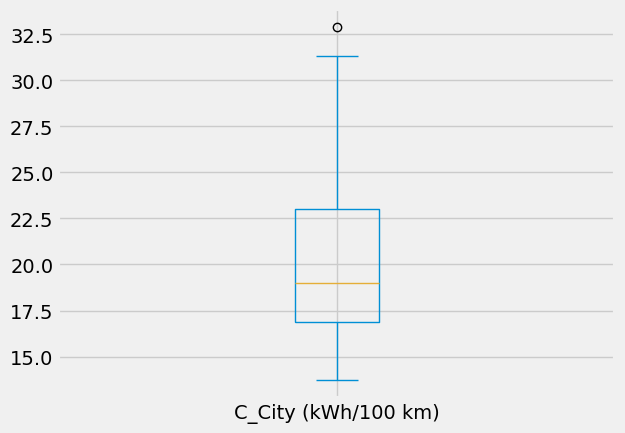

In [30]:
data_df['C_City (kWh/100 km)'].plot.box()

In [34]:
Q1_1 = data_df['C_City (kWh/100 km)'].quantile(0.25)
Q2_1 = data_df['C_City (kWh/100 km)'].quantile(0.75)
QIR_1 = Q2_1-Q1_1
QIR_1

6.100000000000001

In [38]:
((data_df['C_City (kWh/100 km)']>(Q2_1+QIR_1*1.5))|(data_df['C_City (kWh/100 km)']<(Q1_1-QIR_1*1.5))).sum()

1

In [41]:
out1 = (data_df['C_City (kWh/100 km)']>(Q2_1+QIR_1*1.5))|(data_df['C_City (kWh/100 km)']<(Q1_1-QIR_1*1.5))
data_df[out1]=np.nan

<Axes: ylabel='Frequency'>

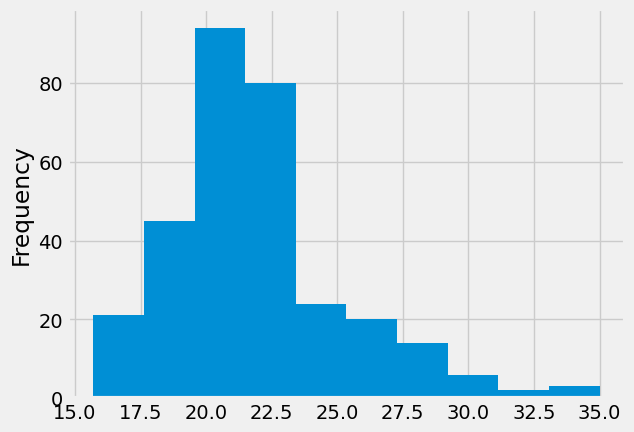

In [42]:
data_df['C_Hwy (kWh/100 km)'].plot(kind='hist', bins=10)

<Axes: >

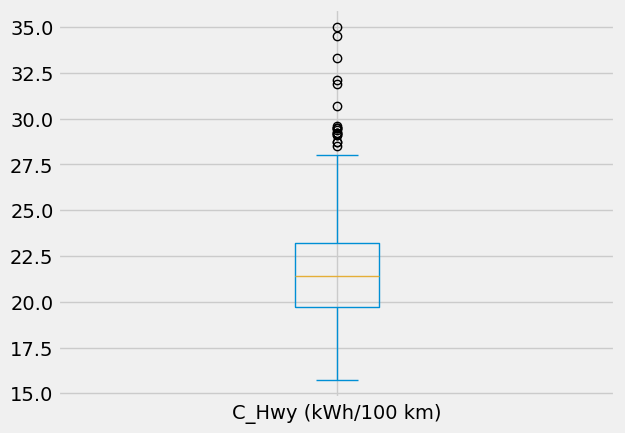

In [43]:
data_df['C_Hwy (kWh/100 km)'].plot.box()

<Axes: >

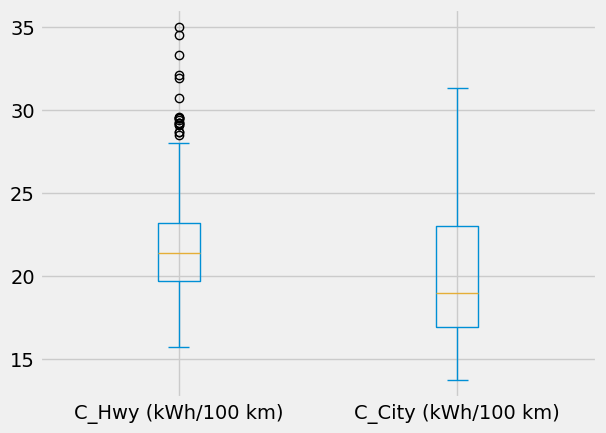

In [44]:
data_df[['C_Hwy (kWh/100 km)','C_City (kWh/100 km)']].plot.box()

In [47]:
Q1_2 = data_df['C_Hwy (kWh/100 km)'].quantile(0.25)
Q2_2 = data_df['C_Hwy (kWh/100 km)'].quantile(0.75)
QIR_2 = Q2_2-Q1_2
QIR_2

3.5

In [48]:
((data_df['C_Hwy (kWh/100 km)']>(Q2_2+QIR_2*1.5))|(data_df['C_Hwy (kWh/100 km)']<(Q1_2-QIR_2*1.5))).sum()

19

In [50]:
out=(data_df['C_Hwy (kWh/100 km)']>(Q2_2+QIR_2*1.5))|(data_df['C_Hwy (kWh/100 km)']<(Q1_2-QIR_2*1.5))
data_df[out]=np.nan 

In [52]:
data_df = data_df.dropna().reset_index(drop=True)


In [53]:
data_df.isnull().sum()

Model_Year             0
Make                   0
Model                  0
Vehicle Class          0
Motor_(kW)             0
Transmission           0
C_City (kWh/100 km)    0
C_Hwy (kWh/100 km)     0
C_Comb (kWh/100 km)    0
C_City (Le/100 km)     0
C_Hwy (Le/100 km)      0
C_Comb (Le/100 km)     0
Range_(km)             0
Recharge_Time (h)      0
dtype: int64

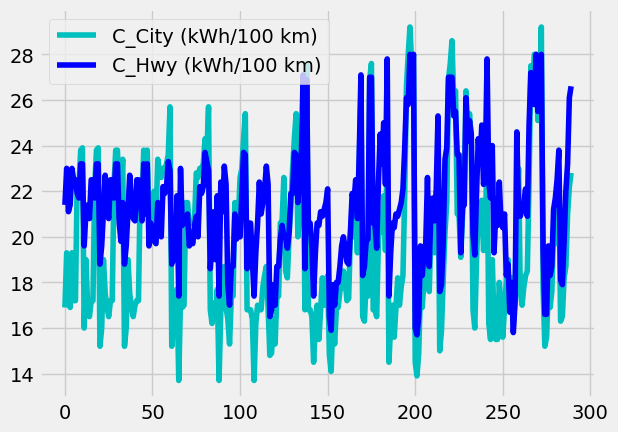

In [56]:
x_ax1 = range(len(data_df))
plt.plot(x_ax1, data_df['C_City (kWh/100 km)'], label="C_City (kWh/100 km)", color='c')
plt.plot(x_ax1, data_df['C_Hwy (kWh/100 km)'], label="C_Hwy (kWh/100 km)", color='b')
#plt.plot(x_ax, Y_test.iloc[:,1], label="y2-test", color='m')
#plt.plot(x_ax, Y_pred[:,1], label="y2-pred", color='r')
plt.legend()
plt.show()

# Loading machine learning packages

In [57]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 2.2 MB/s eta 0:00:00


# Feature selection 

In [60]:
features = ['Model_Year', 'Make', 'Model','Vehicle Class','Motor_(kW)', 'Transmission','Range_(km)','Recharge_Time (h)' ]
X = pd.get_dummies(data_df[features])
y = data_df[['C_City (kWh/100 km)', 'C_Hwy (kWh/100 km)']]

# Train / Test Split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (232, 171) (232, 2)
Test set: (58, 171) (58, 2)


# Building the model

In [62]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
MultiOutput=MultiOutputRegressor(GradientBoostingRegressor(random_state=0))

In [64]:
M_model=MultiOutput.fit(X_train,Y_train)

In [65]:
Y_pred=M_model.predict(X_test)

In [66]:
Y_test[0:5]

,C_City (kWh/100 km),C_Hwy (kWh/100 km)
132,25.4,23.6
266,27.5,27.2
230,24.3,24.2
62,16.2,19.7
110,17.0,20.6


In [67]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, M_model.predict(X_test))

In [68]:
mse

1.1053018934725434

In [69]:
score = M_model.score(X_train, Y_train)
print("Training score:", score)

Training score: 0.9618417024453922


In [70]:
score = M_model.score(X_test, Y_test)
print("Test score:", score)

Test score: 0.8760719155109182


In [71]:
print("y1 MSE:%.4f" % mean_squared_error(Y_test.iloc[:,0], Y_pred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(Y_test.iloc[:,1], Y_pred[:,1]))

y1 MSE:1.1080
y2 MSE:1.1026


In [72]:
import matplotlib.pyplot as plt

In [73]:
Y_test.shape

(58, 2)

In [74]:
Y_test.iloc[:, 0]

132    25.4
266    27.5
230    24.3
62     16.2
110    17.0
27     17.2
91     18.7
187    17.0
85     17.1
218    21.5
88     13.7
11     16.0
139    16.8
158    17.8
12     19.0
18     23.8
289    22.8
59     23.6
239    19.4
204    16.9
119    16.4
127    18.2
102    24.3
175    27.6
168    23.2
90     16.9
283    16.3
201    13.9
51     22.0
238    21.6
225    21.0
105    16.8
179    19.9
205    18.1
123    20.6
257    17.4
231    25.4
287    21.0
229    26.4
279    20.4
280    19.7
273    17.8
150    18.3
212    21.0
181    20.2
120    15.3
89     16.8
176    16.8
206    18.4
99     20.7
211    19.3
164    21.3
39     16.5
58     23.2
177    16.8
198    27.5
117    14.8
4      19.3
Name: C_City (kWh/100 km), dtype: float64

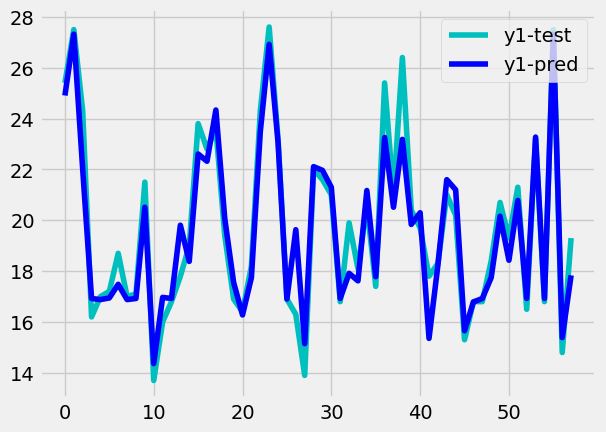

In [75]:
#Finally, we'll visualize the results in the plot and check them visually.

x_ax = range(len(X_test))
plt.plot(x_ax, Y_test.iloc[:,0], label="y1-test", color='c')
plt.plot(x_ax, Y_pred[:,0], label="y1-pred", color='b')
#plt.plot(x_ax, Y_test.iloc[:,1], label="y2-test", color='m')
#plt.plot(x_ax, Y_pred[:,1], label="y2-pred", color='r')
plt.legend()
plt.show()

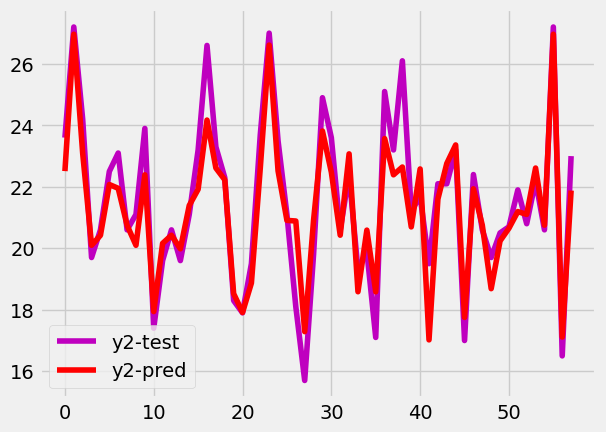

In [76]:
x_ax2 = range(len(X_test))
plt.plot(x_ax2, Y_test.iloc[:,1], label="y2-test", color='m')
plt.plot(x_ax2, Y_pred[:,1], label="y2-pred", color='r')
plt.legend()
plt.show()

# The End